In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.stats import kde
import seaborn as sns
#import scipy.stats as stats
from IPython.display import HTML, display
#import VolvoTrucksAnalytics as VTA

#2 Gammas Fix later
#from scipy.stats import gamma
#from scipy.stats.distributions import gamma
#from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KernelDensity
#from scipy.stats import kde
#from scipy.special import psi, polygamma
#from scipy.optimize import newton

In [22]:
#The two truck data set paths are set here.
truck1csv = "../data/trucks/truck1.csv"
truck2csv = "../data/trucks/truck2.csv"

#The two column header dictonary paths are set here.
truck1dictcsv = "../data/dictionary/truck1dict.csv"
truck2dictcsv = "../data/dictionary/truck2dict.csv"

#Number of records desired from the data set.
numberOfRecords = 100

#If the number of values that are NOT Na type pass this percentage, the row will be deleted
rowNaNThresholdPercent = 75

#Create column conversion dictionaries from CSV files.
truck1dict={}
truck2dict={}
with open(truck1dictcsv, 'r') as f:
    for row in csv.reader(f):
        truck1dict.update({row[0]:row[1]})
        
with open(truck2dictcsv, 'r') as f:
    for row in csv.reader(f):
        truck2dict.update({row[0]:row[1]})
        
def readCsv(truck):
    return pd.read_csv(truck, header = [0])
    
def cullUtcCols(truckData):
    noUTC = truckData.drop(["UTC hour", "UTC minute", "UTC second", "UTC month", "UTC day", "UTC year"], axis = 1)
    return noUTC

"""Takes a DataFrame and a conversion dictionary as parameters;
    uses the dictionary to rename all matching columns then returns the changed DataFrame."""
def renameColumns(dataFrame, dictionary):
    return dataFrame.rename(columns = dictionary)

"""Finds threshold of Non-NA type using percentage and deletes rows."""
def removeUnnecessaryRows(dataFrame):
    length = len(dataFrame.columns)
    TValue = (rowNaNThresholdPercent / 100) * length
    print("Threshold value: " + str(int(TValue)))
    return dataFrame.dropna(thresh = int(TValue))

"""Finds columns with all Na types and deletes them."""
def removeUnnecessaryColumns(dataFrame):
    return dataFrame.dropna(axis=1, how='all')

# NOTE: The following function is unused in this notebook, but it can be used to convert CSV files into
# conversion dictionaries i.e. creating the column rename dictionaries, which was manually done in the
# previous block manually.

"""Creates a Python dictionary from a pre-defined CSV dictionary.
This will only look at the first two columns of the given CSV file."""
def createPythonDictionary(dictionaryCSV):
    # Initialize the resulting dictionary.
    dictResult = {}
    
    # Opens the passed in CSV which defines the rename dictionary and iterates through it to store each value into a Python dictionary.
    with open(dictionaryCSV, 'r') as f:
        for row in csv.reader(f):
            dictResult.update({row[0]:row[1]})
    return dictResult


#For the function divideByDay() make sure to pass in a DataFrame of a truck. 
#If you want specific column of data then just specify it by using quotation and the accurate name of the column. 
#Example: This line will get daily averages for all columns: print(divideByDay(truck1data) 
#This line will get daily average of speed: print(divideByDay(truck1data, "Speed (km/hr)"))

def divideByDay(truck_df, byday_df=None):
    dates = []
    #truck_df = truck_df.head()
    for index, tdata in truck_df.iterrows():
        dates.append(tdata['Time (DateTime)'].split(' ')[0])
        #print(index, dates)
        
    truck_df['Time (DateTime)'] = dates
    
    if(byday_df):
        byday_df = truck_df.groupby('Time (DateTime)')[byday_df].mean()
    else:
        byday_df = truck_df.groupby('Time (DateTime)').mean()

    return byday_df

## Same use as divideByDay() but needs second parameter!! If no parameter given, error will be thrown.
def outlierDetection(truck_df, column_attribute):
    
    iterateData = 0
    fiveNum = [truck_df[column_attribute].quantile(0), truck_df[column_attribute].quantile(.25), truck_df[column_attribute].quantile(.5), truck_df[column_attribute].quantile(.75), truck_df[column_attribute].quantile(1)]
    iqr = fiveNum[3] - fiveNum[1]
    low_outl = fiveNum[1] - (1.5 * iqr)
    high_outl = fiveNum[3] + (1.5 * iqr)
    print("Before Outlier Deletion: " + str(fiveNum))
    print("Low bound: " + str(low_outl))
    print("High bound: " + str(high_outl))
 
    truck_df = truck_df[(truck_df[column_attribute] > low_outl)]
    truck_df = truck_df[(truck_df[column_attribute] < high_outl)]
    fiveNum = [truck_df[column_attribute].quantile(0), truck_df[column_attribute].quantile(.25), truck_df[column_attribute].quantile(.5), truck_df[column_attribute].quantile(.75), truck_df[column_attribute].quantile(1)]
    #iqr = fiveNum[3] - fiveNum[1]
    #low_outl = fiveNum[1] - (1.5 * iqr)
    #high_outl = fiveNum[3] + (1.5 * iqr)
    print("After Outlier Deletion: " + str(fiveNum))

    sns.boxplot(x=truck_df[column_attribute], showfliers=False)
    
    return truck_df



In [28]:
truck1data = readCsv(truck1csv)
truck1data = cullUtcCols(truck1data)
truck1data = removeUnnecessaryRows(truck1data)
truck1data = renameColumns(truck1data, truck1dict)
truck1data = removeUnnecessaryColumns(truck1data)

truck2data = readCsv(truck2csv)
truck2data = cullUtcCols(truck2data)
truck2data = removeUnnecessaryRows(truck2data)
truck2data = renameColumns(truck2data, truck2dict)
truck2data = removeUnnecessaryColumns(truck2data)

Threshold value: 33
Threshold value: 30


In [29]:
# Used same as the outlierDetection() method where attribute has to be specified as parameter.
def KDE_estimator(truck_df, column_attribute):

    truck_df.fillna(value={column_attribute: truck_df[column_attribute].mean()}, inplace=True)

    sns.distplot(truck_df[column_attribute].to_frame(), hist_kws=dict(edgecolor='black', linewidth=2))

    plt.ylabel("Kernel Density Estimate")
    plt.xlabel(column_attribute)
    plt.show()

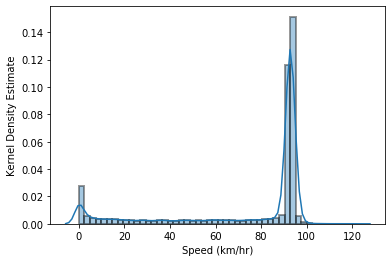

In [30]:
KDE_estimator(truck1data, "Speed (km/hr)")

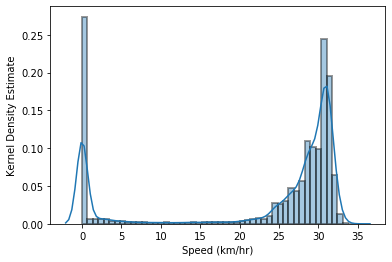

In [31]:
KDE_estimator(truck2data, "Speed (km/hr)")